In [1]:
  !pip install -q -U keras-tuner

In [58]:
pip install tflearn

Note: you may need to restart the kernel to use updated packages.


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import  LogisticRegression,LinearRegression
from sklearn.svm import  SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, BatchNormalization,Dropout, Convolution2D,Input,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import  Adam, SGD
from tensorflow.keras.initializers import GlorotUniform, GlorotNormal,HeNormal,HeUniform
from tensorflow.keras.regularizers import L2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import  train_test_split,GridSearchCV,cross_val_score
import tensorflow
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import tkinter as tk
from tkinter import ttk,Tk
from google.colab.patches import cv2_imshow
from google.colab import files
from tensorflow.keras.models import load_model
from PIL import Image
import kerastuner as kt
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [4]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## 1. Import the data and analyse the dimension of data.

In [60]:
#Import dataset 
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [61]:
(X,Y) = oxflower17.load_data()

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [7]:
#Dimension of data
print("Dimensions of data :", X.shape)
print("Dimensions of label :", Y.shape)

Dimensions of data : (1360, 224, 224, 3)
Dimensions of label : (1360,)


In [ ]:
# The data contains 1360 rows of images of size 224*224*3 pixels, 224*224 being the size of each image and 3 being the channel size.

## 2. Preprocess the data.

In [62]:
trainX,testX,trainY,testY = train_test_split(X,Y, test_size=0.25)

In [10]:
print("Minimum value in training set :",trainX.min())
print("Maximum value in training set :",trainX.max())
print("Minimum value in test set :",testX.min())
print("Maximum value in test set :",testX.max())

Minimum value in training set : 0.0
Maximum value in training set : 1.0
Minimum value in test set : 0.0
Maximum value in test set : 1.0


##### Since min and max are already in range 0-1 , we do not need to normalize the data.

In [11]:
#Print shapes post splitting
print("X train shape :" ,trainX.shape)
print("Y train shape :" ,trainY.shape)
print("X test  shape :" ,testX.shape)
print("Y test shape :" ,testY.shape)

X train shape : (1020, 224, 224, 3)
Y train shape : (1020,)
X test  shape : (340, 224, 224, 3)
Y test shape : (340,)


In [12]:
#print first 5  values in test target set
testY[:5]

array([15,  9,  0,  3,  9])

In [13]:
pd.value_counts(trainY)

14    67
11    66
2     65
13    64
4     64
8     63
1     62
10    61
12    60
5     60
7     59
3     58
9     58
0     56
16    55
6     51
15    51
dtype: int64

In [14]:
pd.value_counts(testY)

15    29
6     29
16    25
0     24
9     22
3     22
7     21
12    20
5     20
10    19
1     18
8     17
13    16
4     16
2     15
11    14
14    13
dtype: int64

## 3. Data visualisation

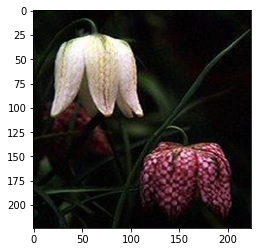

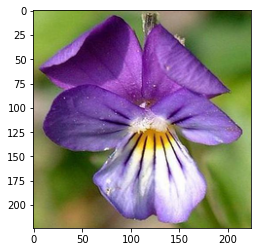

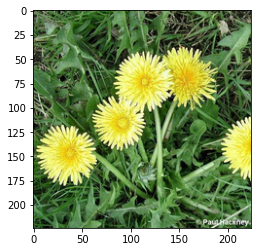

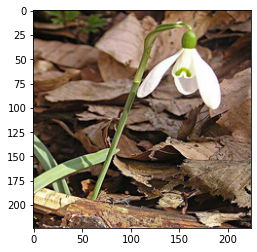

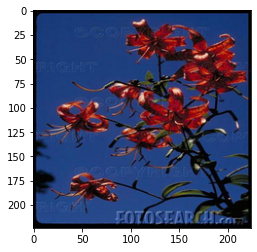

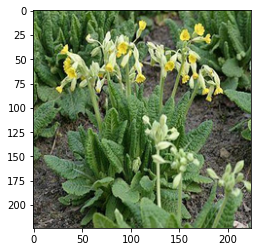

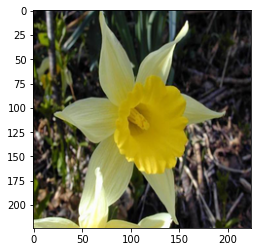

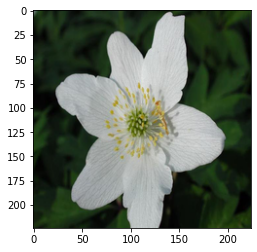

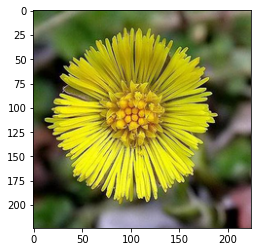

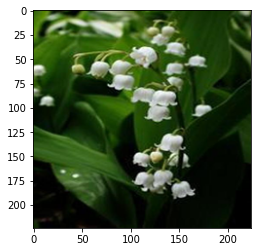

In [15]:
#Display Images
for i in range(400,410):

  plt.imshow(trainX[i],cmap='gray')
  plt.show()

In [17]:
#Display labels

for i in range(400,410):
  print("Label: ", trainY[i])

Label:  15
Label:  3
Label:  16
Label:  12
Label:  7
Label:  5
Label:  9
Label:  2
Label:  8
Label:  16


Label : 5


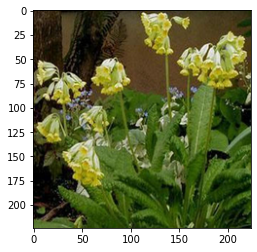

Label : 6


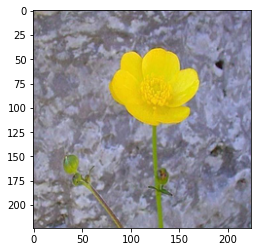

Label : 5


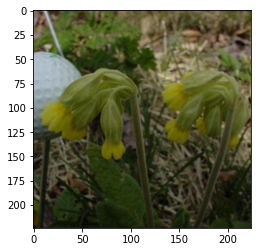

Label : 15


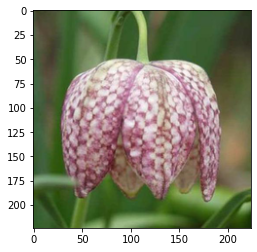

Label : 3


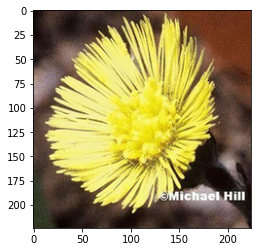

Label : 13


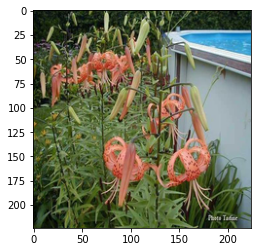

Label : 9


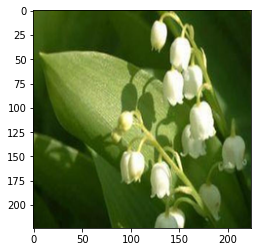

Label : 0


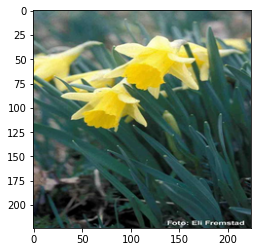

Label : 6


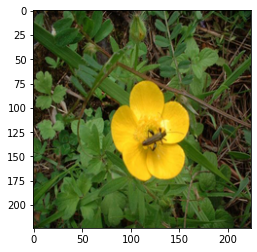

Label : 0


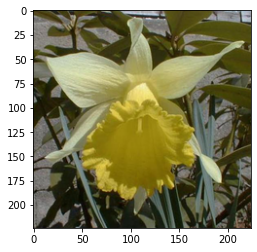

In [18]:
#Images vs Labels
for i in range(200,210):
  print("Label :",trainY[i])
  plt.imshow(trainX[i],cmap='gray')
  plt.show()

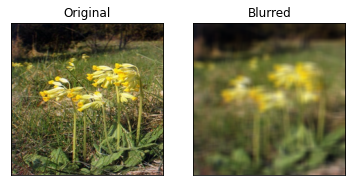

In [19]:
#Apply different filters on images and display the images
#Blur
flowerImg = trainX[100]
blurredImg = cv2.blur(flowerImg,(9,9))
plt.subplot(121),plt.imshow(flowerImg),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurredImg),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


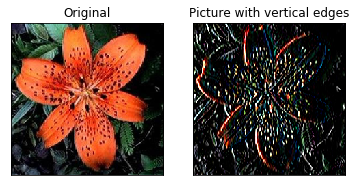

In [63]:
#Edge Detection: Vertical
edge_matrix=  np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
flowerImg2= trainX[200]
verticalEdge = cv2.filter2D(flowerImg2, -1, edge_matrix)
plt.subplot(121),plt.imshow(flowerImg2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(verticalEdge),plt.title('Picture with vertical edges')
plt.xticks([]), plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


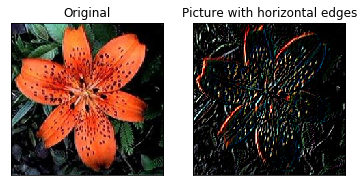

In [64]:
#Edge Detection: Horizantal
edge_matrix_hor=  np.array([[-1,-1, 1],
                   [0, 0, 0],
                   [-1,1, 1]])
HorizaontalEdge = cv2.filter2D(flowerImg2, -1, edge_matrix_hor)
plt.subplot(121),plt.imshow(flowerImg2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(HorizaontalEdge),plt.title('Picture with horizontal edges')
plt.xticks([]), plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


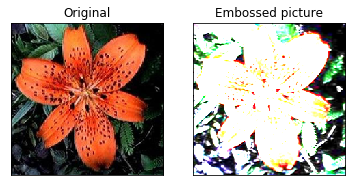

In [65]:
#Emboss
emboss_matrix=  np.array([[-1,-1,0, 0],
                   [1,1,1,1],
                   [1,2,2,2],
                   [0,0,1,1]])
embossImg = cv2.filter2D(flowerImg2, -1, emboss_matrix)
plt.subplot(121),plt.imshow(flowerImg2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(embossImg),plt.title('Embossed picture')
plt.xticks([]), plt.yticks([])
plt.show()

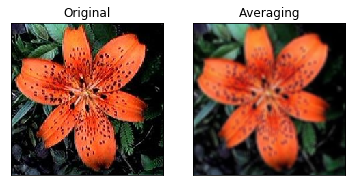

In [66]:
#Smoothening

smooth_matrix = np.ones((5,5),np.float32)/25
smoothImg = cv2.filter2D(flowerImg2,-1,smooth_matrix)

plt.subplot(121),plt.imshow(flowerImg2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(smoothImg),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## 4. Train tune and test AIML image classifier model using:
    • Supervised learning algorithms for training
    • Use neural networks for training
    • Use CNN for training
    • Use various CNN with transferred learning models for training

### 4.1 Supervised learning algorithm

In [25]:
X_shaped=X.reshape(1360,150528)


In [26]:
#Standdard scaling and dimensionality reduction
scale = StandardScaler()
flowersScale = scale.fit_transform(X_shaped)
pca = PCA(n_components=50)
flowers_pca = pca.fit_transform(flowersScale)
print('PCA  shape for train ds is: ', flowers_pca.shape)
(trainX_scale, testX_scale, trainY_scale, testY_scale) = train_test_split(flowers_pca, Y, test_size=0.25) 

PCA  shape for train ds is:  (1360, 50)


In [27]:
#SVC classifier model
linearsvc=SVC(C=0.90,decision_function_shape='ovo',kernel='rbf')
linearsvc.fit(trainX_scale,trainY_scale)
svc_pred=linearsvc.predict(testX_scale)
svc_pred_train=linearsvc.predict(trainX_scale)
print('SVC train Accuracy: %.3f' % accuracy_score(trainY_scale,svc_pred_train))
print('SVC test Accuracy: %.3f' % accuracy_score(testY_scale,svc_pred))

SVC train Accuracy: 0.790
SVC test Accuracy: 0.450


In [28]:
from sklearn.metrics import classification_report
print("Classification report : \n",classification_report(testY_scale,svc_pred))

Classification report : 
               precision    recall  f1-score   support

           0       0.36      0.38      0.37        21
           1       0.03      0.07      0.05        14
           2       0.70      0.64      0.67        22
           3       0.39      0.44      0.41        16
           4       0.33      0.59      0.43        17
           5       0.22      0.27      0.24        22
           6       0.35      0.33      0.34        18
           7       0.67      0.67      0.67        18
           8       0.71      0.59      0.65        17
           9       0.45      0.56      0.50        16
          10       0.32      0.56      0.41        16
          11       0.50      0.30      0.38        23
          12       0.77      0.68      0.72        25
          13       0.60      0.55      0.57        22
          14       0.29      0.07      0.12        27
          15       0.41      0.33      0.37        21
          16       1.00      0.64      0.78        25



In [ ]:
#SVC with Hyperparameter tuning

In [29]:
tuned_parameters = [{'kernel': ['rbf'],'C': [0.1,0.5,0.8,0.9,1, 10, 100, 1000]}]

In [30]:
clf = GridSearchCV(SVC(), tuned_parameters, verbose = 3)
clf.fit(trainX_scale,trainY_scale)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.123, total=   0.2s
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=0.1, kernel=rbf, score=0.123, total=   0.2s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.103, total=   0.2s
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ................... C=0.1, kernel=rbf, score=0.083, total=   0.2s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.083, total=   0.2s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ................... C=0.5, kernel=rbf, score=0.441, total=   0.2s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ................... C=0.5, kernel=rbf, score=0.446, total=   0.1s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ................... C=0.5, kernel=rbf, score=0.451, total=   0.1s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ................... C=0.5, kernel=rbf, score=0.417, total=   0.2s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ................... C=0.5, kernel=rbf, score=0.436, total=   0.1s
[CV] C=0.8, kernel=rbf ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    6.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 0.8, 0.9, 1, 10, 100, 1000],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [31]:
clf.best_score_

0.5088235294117648

In [32]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [33]:
results= clf.cv_results_
results

{'mean_fit_time': array([0.148105  , 0.12839942, 0.12510471, 0.12960567, 0.12837868,
        0.15350866, 0.15217443, 0.1523303 ]),
 'mean_score_time': array([0.02130175, 0.01987605, 0.02021055, 0.01971731, 0.02118855,
        0.02045035, 0.0193893 , 0.01988358]),
 'mean_test_score': array([0.10294118, 0.43823529, 0.46862745, 0.4745098 , 0.47745098,
        0.50882353, 0.50588235, 0.50588235]),
 'param_C': masked_array(data=[0.1, 0.5, 0.8, 0.9, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1, 'kernel': 'rbf'},
  {'C': 0.5, 'kernel': 'rbf'},
  {'C': 0.8, 'kernel': 'rbf'},
  {'C': 0.9, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel

In [34]:
linearsvc=SVC(C=10,decision_function_shape='ovo',kernel='rbf')
scores=cross_val_score(linearsvc,trainX_scale,trainY_scale,cv=15)
scores

array([0.57352941, 0.57352941, 0.54411765, 0.44117647, 0.51470588,
       0.48529412, 0.57352941, 0.54411765, 0.51470588, 0.51470588,
       0.52941176, 0.51470588, 0.48529412, 0.44117647, 0.39705882])

In [35]:
np.mean(scores)

0.5098039215686275

#### 4.2 Neural Network

In [16]:
#Neural network
trainX_reshape =trainX.reshape(1020,150528)    #224*224*3 =150528
testX_reshaped = testX.reshape(340,150528)



In [17]:
trainY_encode=tensorflow.keras.utils.to_categorical(trainY,num_classes=17)
testY_encode =tensorflow.keras.utils.to_categorical(testY,num_classes=17)

In [69]:
def build_NNmodel(hp):  
  model = Sequential([
    
    Dense(
        units=hp.Int('Dense1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape =(150528,),
        kernel_initializer =hp.Choice('wt_initialiser', values=['glorot_uniform','glorot_normal','he_uniform','he_normal']),
       # kernel_regularizer=L2(hp.Choice('regulariser', values=[1E-2,2e-2, 1E-3,2e-3 ,1E-4, 2e-4,1E-5,2e-5]))
    ),
    # BatchNormalization(),
   # Dropout(hp.Choice('dropoutRate1', values=[0.4,.5,.6])),
     Dense(
        units=hp.Int('Dense2', min_value=32, max_value=512, step=32),
        activation='relu',
        kernel_initializer =hp.Choice('wt_initialiser1', values=['glorot_uniform','glorot_normal','he_uniform','he_normal']),
       # kernel_regularizer=L2(hp.Choice('regulariser1', values=[1E-2,2e-2, 1E-3,2e-3 ,1E-4, 2e-4,1E-5,2e-5]))
        ),
#		BatchNormalization(),
 #   Dropout(hp.Choice('dropoutRate2', values=[0.4,.5,.6])),
     Dense(
        units=hp.Int('Dense3', min_value=32, max_value=512, step=32),
        activation='relu',
        kernel_initializer =hp.Choice('wt_initialiser2', values=['glorot_uniform','glorot_normal','he_uniform','he_normal']),
        #kernel_regularizer=L2(hp.Choice('regulariser2', values=[1E-2, 1E-3,1E-4, 1E-5]))
    ),
   # BatchNormalization(),
  #  Dropout(hp.Choice('dropoutRate3', values=[0.4,.5,.6])),
     Dense(
        units=hp.Int('Dense4', min_value=32, max_value=512, step=32),
        activation='relu',    
        kernel_initializer =hp.Choice('wt_initialiser3', values=['glorot_uniform','glorot_normal','he_uniform','he_normal'])   ,
        #kernel_regularizer=L2(hp.Choice('regulariser3', values=[1E-2,1E-3,1E-4, 1E-5]))     
    ),
 #  BatchNormalization(),
 # Dropout(hp.Choice('dropoutRate4', values=[0.4,.5,.6])),
 

   # BatchNormalization(),
    Dense(17, activation='softmax',kernel_regularizer=L2(hp.Choice('regulariser8', values=[1E-2, 1E-3,1E-4, 1E-5])),
          kernel_initializer =hp.Choice('wt_initialiser8', values=['glorot_uniform','glorot_normal','he_uniform','he_normal']))
  ])
  
  model.compile(optimizer=SGD(hp.Choice('learning_rate',  values=[1E-2,1E-3,1E-4])),
                          loss='categorical_crossentropy',
                           metrics=['accuracy'])
  
  return model

In [70]:

tuner_search=RandomSearch(build_NNmodel,objective='acc',max_trials=5,directory='output65',project_name="Flower")

In [71]:
    tuner_search.search(trainX_reshape,trainY_encode,epochs=20,validation_data=(testX_reshaped,testY_encode))

Trial 5 Complete [00h 02m 32s]
acc: 0.6647058725357056

Best acc So Far: 0.6647058725357056
Total elapsed time: 00h 08m 57s
INFO:tensorflow:Oracle triggered exit


In [72]:
modelFlowerNN = tuner_search.get_best_models(num_models=1)[0]

In [75]:
modelFlowerNN.fit(trainX_reshape,trainY_encode,epochs=50,validation_data=(testX_reshaped,testY_encode))

Train on 1020 samples, validate on 340 samples
Epoch 1/50
1020/1020 [==============================] - 7s 7ms/sample - loss: 0.1977 - acc: 0.9598 - val_loss: 2.2998 - val_acc: 0.4824
Epoch 2/50
1020/1020 [==============================] - 7s 7ms/sample - loss: 0.2092 - acc: 0.9559 - val_loss: 1.8488 - val_acc: 0.5176
Epoch 3/50
1020/1020 [==============================] - 7s 7ms/sample - loss: 0.1382 - acc: 0.9765 - val_loss: 1.8594 - val_acc: 0.5382
Epoch 4/50
1020/1020 [==============================] - 7s 7ms/sample - loss: 0.1200 - acc: 0.9824 - val_loss: 1.8668 - val_acc: 0.5324
Epoch 5/50
1020/1020 [==============================] - 7s 7ms/sample - loss: 0.0930 - acc: 0.9882 - val_loss: 1.8846 - val_acc: 0.5441
Epoch 6/50
1020/1020 [==============================] - 7s 7ms/sample - loss: 0.0903 - acc: 0.9931 - val_loss: 1.8654 - val_acc: 0.5382
Epoch 7/50
1020/1020 [==============================] - 7s 7ms/sample - loss: 0.0636 - acc: 0.9980 - val_loss: 2.1174 - val_acc: 0.5294
E

In [76]:

print("Test set accuracy :",modelFlowerNN.evaluate(testX_reshaped,testY_encode))

Test set accuracy : [2.2717643653645236, 0.5382353]


In [77]:
prediction = np.argmax(modelFlowerNN.predict(testX_reshaped), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [78]:
for i in range(5,10):
  print("Actual Label :",testY_encode[i])
  print("Predicted label: ",prediction[i])

Actual Label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Predicted label:  12
Actual Label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted label:  14
Actual Label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Predicted label:  11
Actual Label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted label:  7
Actual Label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Predicted label:  13


### 4.3 CNN

In [72]:
train_gen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.25)

train_generator = train_gen.flow_from_directory(
       '/content/17flowers/jpg',  
        target_size=(224, 224),  
        batch_size=32,
        class_mode='categorical',
        subset="training")  

validation_generator = train_gen.flow_from_directory(
       '/content/17flowers/jpg',     
        target_size=(224, 224),  
        batch_size=32,
        class_mode='categorical',
        subset="validation") 


Found 1020 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [87]:
trainXCNN,trainYCNN= next(train_generator)
testXCCNN,testYCNN =next(validation_generator)

In [15]:
checkpointFlower = tensorflow.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/GL Assignment/Convolutional Neural network/FlowersClassifierCNN.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose = 1)

In [19]:
#CNN for training
#CNN for training
modelCNN = Sequential()
modelCNN.add(Conv2D(filters=128, kernel_size=3, activation="relu", input_shape=(224,224,3),kernel_initializer='he_normal'))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(BatchNormalization())
modelCNN.add(Conv2D(filters=128, kernel_size=3, activation="relu",kernel_initializer='he_normal'))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(BatchNormalization())
modelCNN.add(Conv2D(filters=64, kernel_size=3, activation="relu",kernel_initializer='he_normal'))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Conv2D(filters=64, kernel_size=3, activation="relu",kernel_initializer='he_normal'))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(rate=0.4))
modelCNN.add(Flatten())
modelCNN.add(Dense(256, activation="relu"))
modelCNN.add(BatchNormalization())
modelCNN.add(Dropout(rate=0.4))
modelCNN.add(Dense(128, activation="relu"))
modelCNN.add(BatchNormalization())
modelCNN.add(Dropout(rate=0.4))
modelCNN.add(Dense(64, activation="relu"))
modelCNN.add(BatchNormalization())
modelCNN.add(Dropout(rate=0.3))
modelCNN.add(Dense(17, activation="softmax"))
# Compile the model
#sgd = SGD(learning_rate=0.00027483485594610876,decay= 1e-5, momentum=0.9)
modelCNN.load_weights('/content/drive/MyDrive/GL Assignment/Convolutional Neural network/FlowersClassifierCNN.h5')
modelCNN.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

# Fit the model
#modelCNN.fit( x=trainXCNN, y=trainYCNN, batch_size=200, epochs=10)

historyFlowerCNN = modelCNN.fit(train_generator, 
             steps_per_epoch= 1020 // 16,
             validation_data = validation_generator,
             validation_steps = 340//16,
            callbacks = [checkpointFlower],
 epochs=10,verbose=1)

Epoch 1/10
63/63 [==============================] - ETA: 0s - batch: 31.0000 - size: 31.8730 - loss: 0.4303 - acc: 0.8606 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Epoch 00001: val_acc did not improve from 0.77424
63/63 [==============================] - 765s 12s/step - batch: 31.0000 - size: 31.8730 - loss: 0.4303 - acc: 0.8606 - val_loss: 0.8800 - val_acc: 0.7530
Epoch 2/10
63/63 [==============================] - ETA: 0s - batch: 31.0000 - size: 31.8730 - loss: 0.4633 - acc: 0.8616 
Epoch 00002: val_acc did not improve from 0.77424
63/63 [==============================] - 771s 12s/step - batch: 31.0000 - size: 31.8730 - loss: 0.4633 - acc: 0.8616 - val_loss: 0.7438 - val_acc: 0.7727
Epoch 3/10
63/63 [==============================] - ETA: 0s - batch: 31.0000 - size: 31.8730 - loss: 0.4253 - acc: 0.8735 
Epoch 00003: val_acc did not improve from 0.77424
63/63 [==============================] - 760s 12s/step - batch: 31.0000 - size: 31.8730 - loss: 0.4253 - acc: 0.8735 - val_loss: 1.0269 - val_acc: 0.7379
Epoch 4/10
63/63 [==============================] - ETA: 0s - batch: 31.0000 - size: 31.8730 - loss: 0.4281 - acc: 0.8665 
Epoch 00004: val_a

In [20]:
modelCNN.evaluate(testXCCNN,testYCNN)

[1.1702051162719727, 0.75]

In [21]:
modelCNN.evaluate(trainXCNN,trainYCNN)

[0.34690654277801514, 0.875]

In [22]:
modelCNN.save("/content/drive/MyDrive/GL Assignment/Convolutional Neural network/FlowersClassifierCNN.h5")

In [23]:
predictFlowerCNN = np.argmax(modelCNN.predict(testXCCNN),axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Predicted value:  1
Actual value:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


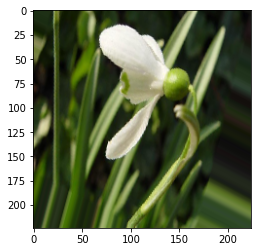

Predicted value:  11
Actual value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


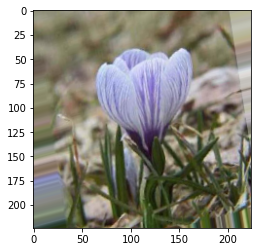

Predicted value:  1
Actual value:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


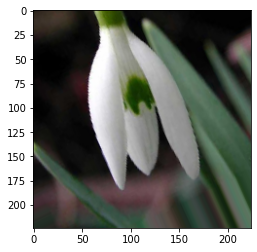

Predicted value:  3
Actual value:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


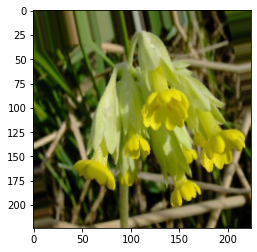

Predicted value:  0
Actual value:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


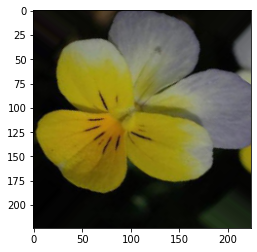

Predicted value:  4
Actual value:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


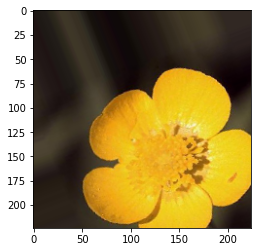

Predicted value:  4
Actual value:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


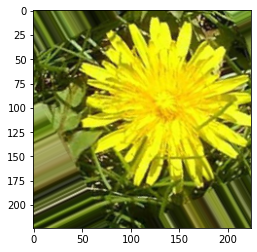

Predicted value:  11
Actual value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


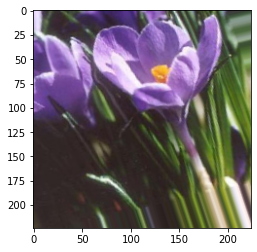

Predicted value:  11
Actual value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


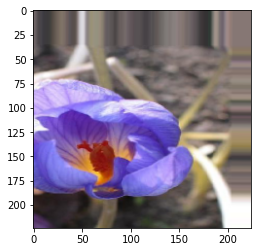

Predicted value:  1
Actual value:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


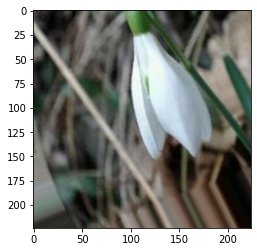

In [ ]:
for i in range(20,30):
  print("Predicted value: ",predictFlowerCNN[i])
  print("Actual value: ",testYCNN[i])
  plt.imshow(testXCCNN[i])
  plt.show()

### 4.4 CNN with transfer learning

In [24]:
#Initialise and download VGG19 model weights excluding the fully connected layer.
vgg_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (224,224,3))

80142336/80134624 [==============================] - 1s 0us/step


In [25]:
%cd /content/drive/MyDrive/GL Assignment/Convolutional Neural network

/content/drive/MyDrive/GL Assignment/Convolutional Neural network


In [26]:
checkpointFlowerVGG = tensorflow.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/GL Assignment/Convolutional Neural network/FlowersClassifierVGG.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose = 1)


In [28]:
modelVGG= Sequential()
vgg_model.trainable = False
for layer in vgg_model.layers:
  modelVGG.add(layer)
modelVGG.add(Flatten())
modelVGG.add(BatchNormalization()) 
modelVGG.add(Dropout(0.2))
modelVGG.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
modelVGG.add(Dropout(0.2))
modelVGG.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
modelVGG.add(Dropout(0.2))
modelVGG.add(BatchNormalization()) 
modelVGG.add(Dense(40, activation='relu',kernel_initializer='he_uniform'))
modelVGG.add(Dense(17, activation='softmax'))
#learn_rate=0.001
#sgd=SGD(lr=learn_rate,momentum=.9)
modelVGG.load_weights('/content/drive/MyDrive/GL Assignment/Convolutional Neural network/FlowersClassifierVGG.h5')
modelVGG.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
historyVGG= modelVGG.fit(train_generator,epochs=20,validation_data=(validation_generator),callbacks = [checkpointFlowerVGG],verbose=1)

Epoch 1/10
32/32 [==============================] - ETA: 0s - batch: 15.5000 - size: 31.8750 - loss: 0.5298 - acc: 0.8431 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Epoch 00001: val_acc improved from -inf to 0.78529, saving model to /content/drive/MyDrive/GL Assignment/Convolutional Neural network/FlowersClassifierVGG.h5
32/32 [==============================] - 885s 28s/step - batch: 15.5000 - size: 31.8750 - loss: 0.5298 - acc: 0.8431 - val_loss: 0.8502 - val_acc: 0.7853
Epoch 2/10
32/32 [==============================] - ETA: 0s - batch: 15.5000 - size: 31.8750 - loss: 0.4911 - acc: 0.8451 
Epoch 00002: val_acc improved from 0.78529 to 0.78824, saving model to /content/drive/MyDrive/GL Assignment/Convolutional Neural network/FlowersClassifierVGG.h5
32/32 [==============================] - 884s 28s/step - batch: 15.5000 - size: 31.8750 - loss: 0.4911 - acc: 0.8451 - val_loss: 0.7728 - val_acc: 0.7882
Epoch 3/10
32/32 [==============================] - ETA: 0s - batch: 15.5000 - size: 31.8750 - loss: 0.4633 - acc: 0.8471 
Epoch 00003: val_acc did not improve from 0.78824
32/32 [==============================] - 876s 28s/step - batch: 15.5000 - si

In [29]:
#save the model for future use
modelVGG.save('/content/drive/MyDrive/GL Assignment/Convolutional Neural network/FlowersClassifierVGG.h5')

In [30]:
modelVGG.evaluate(trainXCNN,trainYCNN)

[0.16627603769302368, 0.96875]

In [31]:
modelVGG.evaluate(testXCCNN,testYCNN)

[0.6206525564193726, 0.8125]

In [83]:
modelVGG = load_model('/content/drive/MyDrive/GL Assignment/Convolutional Neural network/FlowersClassifierVGG.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [88]:
#Predictions
flowerPredictions = np.argmax(modelVGG.predict(testXCCNN), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Predicted value:  9
Actual value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


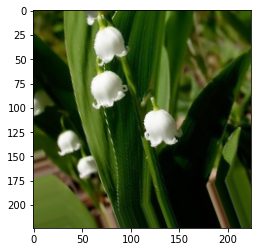

Predicted value:  5
Actual value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


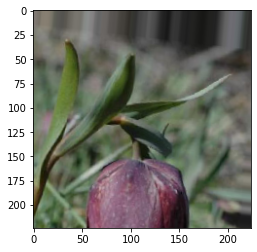

Predicted value:  5
Actual value:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


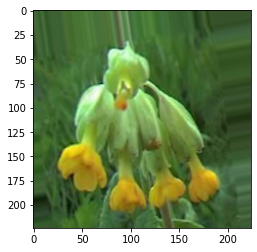

Predicted value:  15
Actual value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


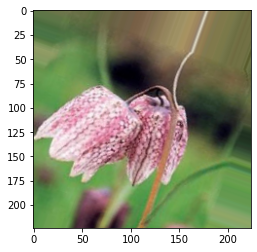

Predicted value:  3
Actual value:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


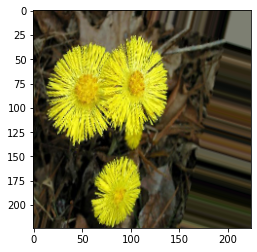

Predicted value:  1
Actual value:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


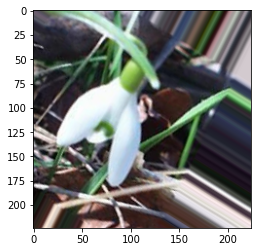

In [89]:
#Compare actual values and predicted values along with the images 
for i in range(23,29):
  print("Predicted value: ",flowerPredictions[i])
  print("Actual value: ",testYCNN[i])
  plt.imshow(testXCCNN[i])
  plt.show()


In [ ]:
#5 out 6 of our predictions are correct 

### Compare the results from the above step along with your detailed observations
Accuracies for the  models are as follows:
  1. Supervised learning using SVM : 50.7
  2. Neural Network : 53.8
  3. Convolutional Neural Network: 75
  4. CNN with transferred learning:81.25

Out of the four models, CNN model has performed the best.We have used VGG model for transferred learning so that the trained weights can be utlilised to improve accuracy in lesser time. Hence transfer learning with VGG19 has given an accuracy of 81.25 for our oxford flower dataset having 17 categories.

## 5. Create a GUI to import the image “Prediction.jpg” and use the above designed AIML image classification model to predict the class/label of this image.

In [75]:



tkWind =tk.Tk()
tkWind.title('CLASSIFIER GUI-Great Learning')
#canvas = Canvas(tkWind, width = 300, height = 300)  
#canvas.pack()  


#Step 1 :File Name
fileNamelbl = ttk.Label(tkWind,text='Step 1: File Name')
fileNamelbl.grid(row=0, column=0,sticky=tk.W)
name_var=tk.StringVar()
name_entry =ttk.Entry(tkWind,textvariable=name_var)
name_entry.grid(row=0, column=1)
#df = pd.DataFrame()
def import_data():
    base_path ='/content/drive/MyDrive/GL Assignment/Convolutional Neural network/'
    fileName =(name_var.get())
    path =base_path+fileName#
    flowerImg = cv2.imread(fileName) 
    
    #cv2_imshow(flowerImg)
    return flowerImg
# Output img with window name as 'image'
#cv2_imshow(img)

#Imprt data button
importButton =ttk.Button(tkWind,text='Import data', command=import_data)
importButton.grid(row=0,column=2)


def predict_class():
    model2 = load_model('/content/drive/MyDrive/GL Assignment/Convolutional Neural network/FlowersClassifierVGG.h5')
    #model2= load_model('FlowersClassifierVGG.h5')
    flowerImage= import_data()
    
    
    resized = cv2.resize(flowerImage, (224,224), interpolation=cv2.INTER_AREA)  
    flowerImage = np.reshape(resized,[1,224,224,3])
    predictFlower =model2.predict_classes(flowerImage)

    flowerLabels = (train_generator.class_indices)
    flowerLabels = dict((v,k) for k,v in flowerLabels.items())
    prediction = flowerLabels[predictFlower[0]] 


    predictString_lbl = ttk.Entry(tkWind)
    predictString_lbl.grid(row=1,column=3)
    predictString_lbl.insert(1,str(prediction))
    print(predictFlower)
    
predictImage =ttk.Button(tkWind,text='Predict', command=predict_class)
predictImage.grid(row=1,column=2)







tkWind.mainloop()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\AshwiniShivaprasad\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
C:\Users\AshwiniShivaprasad\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  if class_weight:


{0: '0', 1: '1', 2: '10', 3: '11', 4: '12', 5: '13', 6: '14', 7: '15', 8: '16', 9: '2', 10: '3', 11: '4', 12: '5', 13: '6', 14: '7', 15: '8', 16: '9'}
10
[2]


# PART 5: Explain in depth your strategy to maintain and support the AIML image classifier after it in production. Import image from your machine Predict image class using a trained AIML image classifier.

Some points one can follow after the model is deployed to production environment:
1.	Nature of data keeps changing all the time. So, it needs to be continuously monitored or gathered in real-time. Incoming data and distribution can be verified it is like the distribution of training data with which the model was trained. Data Changes can be tracked by few statistics like mean, variance, standard deviation, correlation etc. 

2.	To validate the model’s performance in real-time, labels/predictions can be collected for a specific timeframe. Performance metrics can be calculated. This can be checked with metrics value obtained during training phase.

3.	If the above two aspects are significantly varying from original setup, then our model can be retrained with chunks of latest incoming data. Model performance needs to be continuously tracked and can be retrained accordingly as per business requirements.
